In [2]:
!pip install tqdm

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [4]:
# 必须先导入这些库，并给它们起对应的“别名”
import sys
import matplotlib as mpl       # 定义 mpl
import matplotlib.pyplot as plt
import numpy as np             # 定义 np
import pandas as pd            # 定义 pd
import sklearn                 # 定义 sklearn
import torch                   # 定义 torch

# --- 以下是你原本的代码 ---

print(sys.version_info)

# 现在这些变量都已经定义过了，循环就可以正常运行了
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

sys.version_info(major=3, minor=14, micro=2, releaselevel='final', serial=0)
matplotlib 3.10.8
numpy 2.4.1
pandas 3.0.0
sklearn 1.8.0
torch 2.10.0+cu130
cuda:0


In [5]:
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
print(sys.version_info)
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

sys.version_info(major=3, minor=14, micro=2, releaselevel='final', serial=0)
matplotlib 3.10.8
numpy 2.4.1
pandas 3.0.0
sklearn 1.8.0
torch 2.10.0+cu130
cuda:0


In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms


# 定义数据集的变换
transform = transforms.Compose([
    transforms.ToTensor(), # 转换为tensor，进行归一化
    # transforms.Normalize(mean, std) # 标准化，mean和std是数据集的均值和方差
])
# fashion_mnist图像分类数据集，衣服分类，60000张训练图片，10000张测试图片
train_ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_ds = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

In [7]:
type(train_ds)

torchvision.datasets.mnist.FashionMNIST

In [8]:
len(train_ds)

60000

In [9]:
type(train_ds[0])


tuple

In [10]:
img,label=train_ds[0]
img.shape

torch.Size([1, 28, 28])

In [11]:
print(train_ds[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

In [12]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [13]:
type(img)

torch.Tensor

In [14]:
# 显示图片，这里需要把transforms.ToTensor(), 进行归一化注释掉，否则是不行的
def show_img_content(img):
    from PIL import Image

    # 打开一个图像文件
    # img = Image.open(img)

    print("图像大小:", img.size)
    print("图像模式:", img.mode)


    # 如果图像是单通道的，比如灰度图，你可以这样获取像素值列表:
    if img.mode == 'L':
        pixel_values = list(img.getdata())
        print(pixel_values)
# show_img_content(img) #这里必须把上面的 transforms.ToTensor(), # 转换为tensor, 进行归一化注

TypeError: Invalid shape (1, 28, 28) for image data

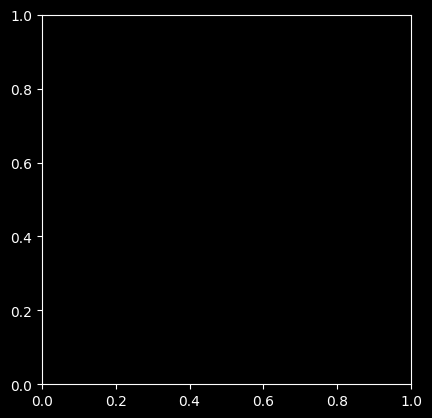

In [15]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.colorbar() # 显示颜色条
    plt.show()

show_single_image(img)

这里如果想画图要把前面的的totensor注释掉

In [16]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__() # 继承父类的初始化方法，子类有父类的属性
        self.flatten = nn.Flatten() # 展平层
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 300),  # in_features=784, out_features=300, 784是输入特征数, 300是输出特征数
            nn.ReLU(), # 激活函数
            nn.Linear(300, 100), # 隐藏层神经元数100
            nn.ReLU(), # 激活函数
            nn.Linear(100, 10), # 输出层神经元数10
        )

    def forward(self, x): # 前向计算
        # x.shape [batch size, 1, 28, 28]
        x = self.flatten(x)
        # 展平后 x.shape [batch size, 784]
        logits = self.linear_relu_stack(x)
        # logits.shape [batch size, 10]
        return logits # 没有经过softmax，称为logits

model = NeuralNetwork()

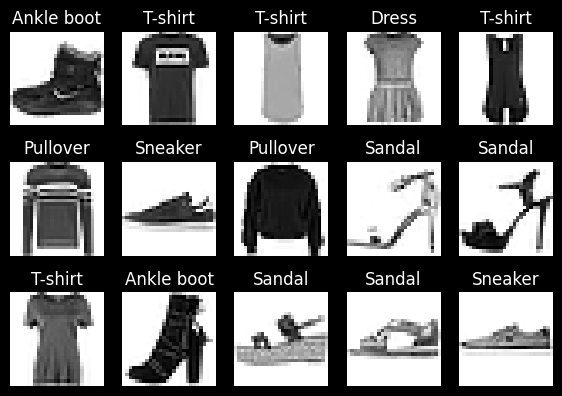

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs(n_rows, n_cols, train_ds, class_names):
    assert n_rows * n_cols < len(train_ds) # 确保打印的图片小于总样本数

    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6)) # 宽1.4高1.6，设置画布大小

    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col # 计算索引，从0开始
            plt.subplot(n_rows, n_cols, index+1) # 因为subplot从1开始计数

            # 获取图像数据和标签
            img_arr, label = train_ds[index]

            # 维度转换：(C, H, W) -> (H, W, C)
            # PyTorch通常是Channel优先，而Matplotlib需要Channel在最后
            img_arr = np.transpose(img_arr, (1, 2, 0)) # 通道换到最后维

            plt.imshow(img_arr, cmap="binary",
                       interpolation = 'nearest') # interpolation='nearest' 是临近插值

            plt.axis('off') # 去除坐标系
            plt.title(class_names[label]) # 显示类别名称

    plt.show()

# 已知的图片类别
# labels在这个路径 https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot'] # 0-9分别代表的类别

# 只是打印了前15个样本 (3行 x 5列)
# 注意：运行此行前，确保 'train_ds' 已经被定义并加载了数据
show_imgs(3, 5, train_ds, class_names)

In [18]:
import torch

# 💡从数据集到dataloader
# train_loader 用于训练模型
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True) # batch_size分批, shuffle洗牌

# val_loader 用于验证/测试模型（通常不需要洗牌）
val_loader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=False)

In [19]:
import torch
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__() # 继承父类的初始化方法，子类有父类的属性
        self.flatten = nn.Flatten() # 展平层
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 300), # 输入特征784，输出特征300
            nn.ReLU(),           # 激活函数
            nn.Linear(300, 100), # 隐藏层神经元数100
            nn.ReLU(),           # 激活函数
            nn.Linear(100, 10),  # 输出层神经元数10
        )

    def forward(self, x): # 前向计算
        # x.shape [batch_size, 1, 28, 28]
        x = self.flatten(x)
        # 展平后 x.shape [batch_size, 784]
        logits = self.linear_relu_stack(x)
        # logits.shape [batch_size, 10]
        return logits # 没有经过softmax，称为logits

model = NeuralNetwork()

In [20]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
# 查看 model网络结构


# 手动计算全连接层参数总量 (Weight + Bias)
# 第一层: 784*300 + 300
# 第二层: 300*100 + 100
# 第三层: 100*10 + 10
784*300+300+300*100+100+100*10+10

只需想想每个节点的逻辑回归就能理解上式

In [21]:
# 重复验证参数量计算
784*300+300+300*100+100+100*10+10

# 遍历模型的所有命名参数，并打印其名称和形状 (Shape)
for name, param in model.named_parameters(): # 打印模型参数
    print(name, param.shape)

linear_relu_stack.0.weight torch.Size([300, 784])
linear_relu_stack.0.bias torch.Size([300])
linear_relu_stack.2.weight torch.Size([100, 300])
linear_relu_stack.2.bias torch.Size([100])
linear_relu_stack.4.weight torch.Size([10, 100])
linear_relu_stack.4.bias torch.Size([10])


In [22]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0224, -0.0205, -0.0016,  ..., -0.0236,  0.0271, -0.0045],
         [ 0.0052,  0.0241, -0.0138,  ...,  0.0237,  0.0103, -0.0279],
         [ 0.0035, -0.0075,  0.0197,  ...,  0.0248, -0.0219,  0.0286],
         ...,
         [-0.0135,  0.0013,  0.0272,  ...,  0.0137, -0.0105, -0.0332],
         [ 0.0128, -0.0149, -0.0241,  ...,  0.0132,  0.0322,  0.0005],
         [-0.0211, -0.0264, -0.0086,  ..., -0.0186, -0.0172, -0.0061]],
        requires_grad=True),
 Parameter containing:
 tensor([-1.3989e-02,  2.1724e-03,  1.7893e-02,  1.5852e-02, -1.6653e-03,
          2.9691e-02, -3.0291e-02, -2.0084e-02, -5.4418e-03, -3.2460e-02,
         -3.1801e-02, -2.0949e-02, -2.3962e-02, -2.7594e-02, -1.0113e-02,
         -2.6836e-02,  3.1301e-02, -5.7686e-04,  5.7058e-03, -3.9082e-04,
          2.0227e-02, -8.7989e-03, -2.9377e-02,  1.2591e-02,  1.3372e-02,
          3.4791e-02, -3.2298e-02,  1.0120e-02, -8.7531e-03, -2.9882e-02,
          6.8574e-03, -3.4604e-02,  3.23

In [23]:
from sklearn.metrics import accuracy_score

# 使用装饰器禁止梯度计算，从而节省显存并加快推理速度
@torch.no_grad()
def evaluating(model, dataloader, loss_fct):
    loss_list = []    # 用于存储每个 batch 的损失值
    pred_list = []    # 用于存储模型预测的类别
    label_list = []   # 用于存储真实的标签

    for datas, labels in dataloader:
        # 将数据和标签搬运到指定的计算设备（如 GPU）
        datas = datas.to(device)
        labels = labels.to(device)

        # 前向传播：将输入数据送入模型得到原始输出 (Logits)
        logits = model(datas)

        # 计算当前 batch 的损失值
        loss = loss_fct(logits, labels)
        loss_list.append(loss.item()) # .item() 将单元素张量转为 Python 数值

        # 获取预测结果：在 10 个输出维度中找到分值最大的索引
        preds = logits.argmax(axis=-1)

        # 将预测值和真实值从 GPU 移回 CPU，并转为普通的 Python 列表存储
        pred_list.extend(preds.cpu().numpy().tolist())
        label_list.extend(labels.cpu().numpy().tolist())

    # 使用 sklearn 计算整体的准确率 (Accuracy)
    acc = accuracy_score(label_list, pred_list)

    # 返回平均损失值和准确率
    return np.mean(loss_list), acc

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np

# 1. 定义损失函数 (采用交叉熵损失)
loss_fct = nn.CrossEntropyLoss() # 内部先做softmax，然后计算交叉熵

# 2. 定义优化器 (采用SGD)
# lr=0.001, momentum=0.9
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. 定义评估函数
@torch.no_grad() # 装饰器，禁止反向传播，节省内存
def evaluating(model, dataloader, loss_fct):
    loss_list = [] # 记录损失
    pred_list = [] # 记录预测
    label_list = [] # 记录标签

    for datas, labels in dataloader: # 10000/32=312
        datas = datas.to(device) # 转到GPU
        labels = labels.to(device) # 转到GPU

        # 前向计算
        logits = model(datas)
        loss = loss_fct(logits, labels) # 验证集损失
        loss_list.append(loss.item()) # 记录损失

        preds = logits.argmax(axis=-1) # 验证集预测，argmax返回最大值索引

        # 将PyTorch张量转换为NumPy数组。只有当张量在CPU上时才能转换
        pred_list.extend(preds.cpu().numpy().tolist())
        label_list.extend(labels.cpu().numpy().tolist())

    acc = accuracy_score(label_list, pred_list) # 计算准确率
    return np.mean(loss_list), acc

In [1]:
from tqdm import tqdm # 导入进度条库

def training(model, train_loader, val_loader, epoch, loss_fct, optimizer, eval_step=500):
    record_dict = {
        "train": [],
        "val": []
    }

    global_step = 0
    model.train() # 开启训练模式

    with tqdm(total=epoch * len(train_loader)) as pbar: # 进度条 1875*20
        for epoch_id in range(epoch): # 训练epoch次
            # training
            for datas, labels in train_loader: # 执行次数是60000/32=1875
                datas = datas.to(device) # datas尺寸是[batch_size, 1, 28, 28]
                labels = labels.to(device) # labels尺寸是[batch_size]

                # 梯度清空
                optimizer.zero_grad()

                # 模型前向计算
                logits = model(datas)

                # 计算损失
                loss = loss_fct(logits, labels)

                # 梯度回传, loss.backward()会计算梯度，loss对模型参数求导
                loss.backward()

                # 调整优化器，更新w,b
                optimizer.step()

                # --- 记录当前批次的训练指标 ---
                preds = logits.argmax(axis=-1) # 训练集预测
                acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy()) # 计算准确率
                loss = loss.cpu().item() # 损失转到CPU, item()取值，一个数值

                record_dict["train"].append({
                    "loss": loss, "acc": acc, "step": global_step
                }) # 记录训练集信息

                # --- 定期评估 (Evaluating) ---
                if global_step % eval_step == 0:
                    model.eval() # 进入评估模式
                    val_loss, val_acc = evaluating(model, val_loader, loss_fct)
                    record_dict["val"].append({
                        "loss": val_loss, "acc": val_acc, "step": global_step
                    })
                    model.train() # 切回训练模式

                # update step
                global_step += 1 # 全局步数加1
                pbar.update(1) # 更新进度条
                pbar.set_postfix({"epoch": epoch_id}) # 设置进度条显示信息

    return record_dict

# --- 开始训练 ---
epoch = 20 # 定义训练轮数
model = model.to(device) # 将模型搬运到 GPU
# 调用训练函数
record = training(model, train_loader, val_loader, epoch, loss_fct, optimizer, eval_step=1000)

NameError: name 'model' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 画线要注意的是损失是不一定在零到1之间的
def plot_learning_curves(record_dict, sample_step=1000):
    # --- 1. 构建 DataFrame ---
    # 将训练记录转换为DataFrame，设置'step'为索引，并进行采样（每sample_step取一个点）
    train_df = pd.DataFrame(record_dict["train"]).set_index("step").iloc[::sample_step]

    # 将验证记录转换为DataFrame，设置'step'为索引
    val_df = pd.DataFrame(record_dict["val"]).set_index("step")

    last_step = train_df.index[-1] # 获取最后一步的步数

    # 打印准确率数据查看（调试用）
    # print(train_df.columns)
    print(train_df['acc'])
    print(val_df['acc'])

    # --- 2. 绘图设置 ---
    fig_num = len(train_df.columns) # 根据列数决定画几张图（通常是loss和acc两张）
    fig, axs = plt.subplots(1, fig_num, figsize=(5 * fig_num, 5))

    # --- 3. 循环绘制每一列数据 ---
    for idx, item in enumerate(train_df.columns):
        # print(train_df[item].values)

        # 绘制训练集曲线
        axs[idx].plot(train_df.index, train_df[item], label=f"train_{item}")
        # 绘制验证集曲线
        axs[idx].plot(val_df.index, val_df[item], label=f"val_{item}")

        axs[idx].grid() # 显示网格
        axs[idx].legend() # 显示图例

        # --- 4. 设置坐标轴格式 ---
        # 设置x轴刻度：每5000步一个刻度
        axs[idx].set_xticks(range(0, train_df.index[-1], 5000))

        # 设置x轴标签：将数值转换为 "xk" 格式（如 5000 -> 5k）
        axs[idx].set_xticklabels(map(lambda x: f"{int(x/1000)}k", range(0, last_step, 5000)))

        axs[idx].set_xlabel("step")

    plt.show()

# 调用绘图函数
# record 是之前训练函数返回的字典
plot_learning_curves(record) # 横坐标是 steps